In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data/')

Found 2041 files belonging to 2 classes.


In [4]:
class_names = data.class_names
class_names

['fake', 'real']

In [5]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

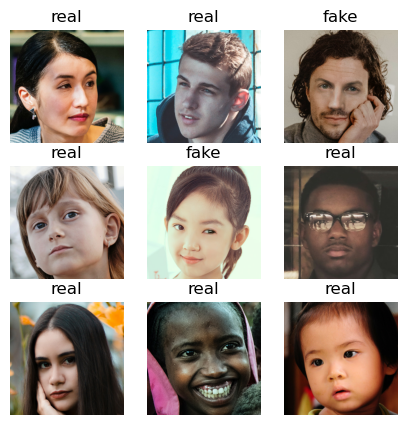

In [6]:
plt.figure(figsize=(5, 5))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
data = data.map(lambda x,y: (x/255, y)) # x/255
data.as_numpy_iterator().next()

(array([[[[0.25620884, 0.30326766, 0.29542452],
          [0.240625  , 0.2876838 , 0.27984068],
          [0.2557263 , 0.294942  , 0.29102042],
          ...,
          [0.6148284 , 0.5520833 , 0.5011029 ],
          [0.58200634, 0.5271044 , 0.48396716],
          [0.5459827 , 0.49892387, 0.45186505]],
 
         [[0.23656078, 0.2836196 , 0.27577648],
          [0.25882256, 0.30588138, 0.29803824],
          [0.2509804 , 0.2901961 , 0.28627452],
          ...,
          [0.6035932 , 0.5408481 , 0.4898677 ],
          [0.569178  , 0.514276  , 0.47113875],
          [0.54260683, 0.495548  , 0.4484892 ]],
 
         [[0.23976141, 0.28682023, 0.2789771 ],
          [0.24563228, 0.2926911 , 0.28484797],
          [0.24203432, 0.28125   , 0.27732843],
          ...,
          [0.6109681 , 0.548223  , 0.49724266],
          [0.57050973, 0.5156078 , 0.47247052],
          [0.54491997, 0.49786115, 0.45080233]],
 
         ...,
 
         [[0.23014706, 0.23014706, 0.2379902 ],
          [0.21980

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Reshape
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet_model.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(Reshape((1, -1))) 
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
loss = 'binary_crossentropy'
model.compile(loss=loss, optimizer='adam', metrics=["accuracy"])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 reshape (Reshape)           (None, 1, 2048)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               1114624   
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 24702465 (94.23 MB)
Trainable params: 1114753 (4.25 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [12]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
44/44 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5071

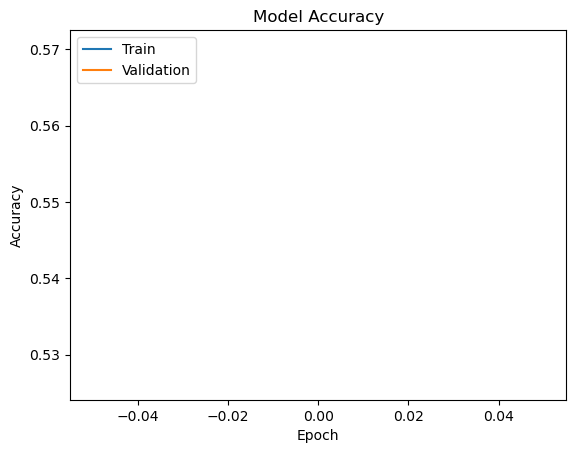

In [16]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit
history = hist.history

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


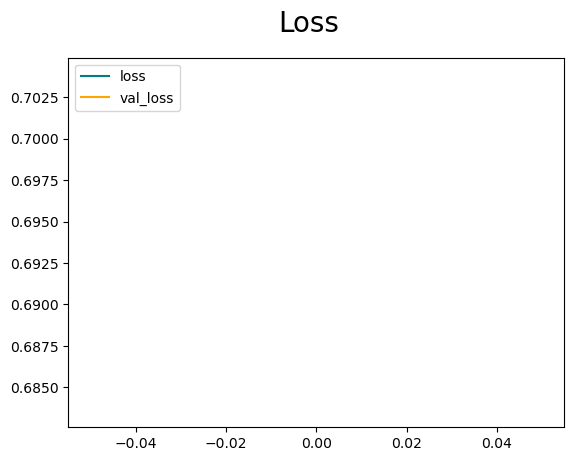

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

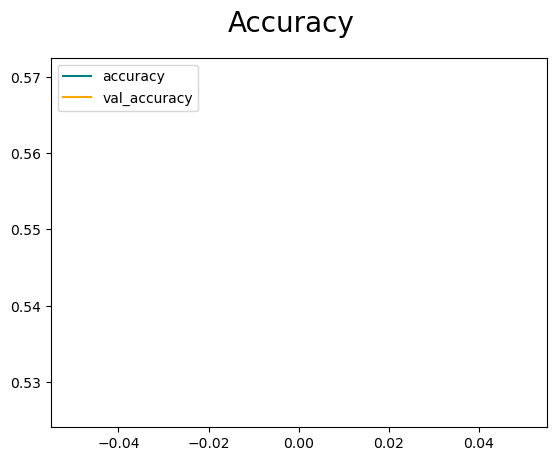

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test)

In [ ]:
print("Loss: ", loss)
print("Accuracy: ", accuracy)